In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Anomaly Detection (30 points)

**Part A (5 Points):**

By dividing a data set into quartiles, IQR is used to measure variability. The data is sorted ascending and divided into four equal parts. Q1, Q2, Q3, also known as the first, second, and third quartiles, are the values that separate the four equal parts.

Use the following data points to calculate outliers in the data
data = [11, 3, 8, 10, 12, 5, 1, 50]

Using a box plot, show the outliers in the box plot.

**Part B (5 points):**

Using the formula to calculate the Z-score detect outliers in the following data points.
data = [6, 3, 9, 6, 9, 20, 3, 10, 3, 50, 6, 5, 9, 9, 3, 6, 3]
Using a box plot, show the outliers in the box plot.

**Part C (20 points):**

Use the dataset attached for identifying the outliers using Z-score.

Steps to follow in this question

- Step1(5 points): Show outliers using histograms and scatterplots. Then

- Step2(7 points): Identify the outliers using Z-score for SalePrice column by using atleast 4 different thresholds.

- Step3(4 points): Print the number of outliers removed.

- Step4(4 points): Use LocalOutlierFactor as discussed in the class to plot the outliers from SalePrice and LotArea columns.

PART A

First Quartile (Q1): 4.5
Second Quartile (Q2): 9.0
Third Quartile (Q3): 11.25
IQR: 6.75
Identified outliers: [50]


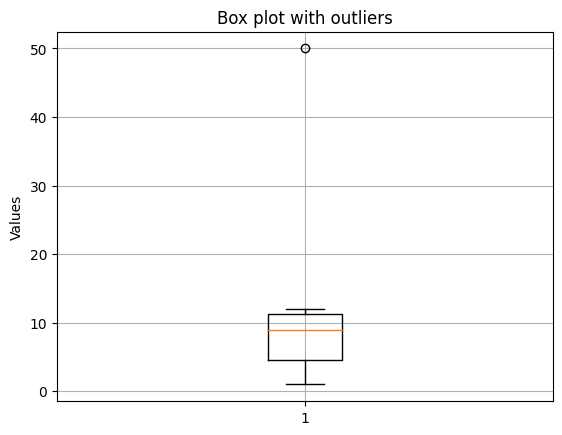

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Input data
data_points = [11, 3, 8, 10, 12, 5, 1, 50]

# Calculating quartiles and IQR
first_quartile = np.percentile(data_points, 25)
second_quartile = np.percentile(data_points, 50)
third_quartile = np.percentile(data_points, 75)
print(f"First Quartile (Q1): {first_quartile}")
print(f"Second Quartile (Q2): {second_quartile}")
print(f"Third Quartile (Q3): {third_quartile}")
iqr = third_quartile - first_quartile
print(f"IQR: {iqr}")

# Calculating lower and upper bounds
lower_bound = first_quartile - 1.5 * iqr
upper_bound = third_quartile + 1.5 * iqr

outliers = [x for x in data_points if x < lower_bound or x > upper_bound]
print(f"Identified outliers: {outliers}")

plt.boxplot(data_points)
plt.grid(True)
plt.title('Box plot with outliers')
plt.ylabel('Values')
plt.show()

PART B

[0.31205354 0.58644544 0.03766163 0.31205354 0.03766163 0.96844201
 0.58644544 0.05380233 0.58644544 3.71236104 0.31205354 0.4035175
 0.03766163 0.03766163 0.58644544 0.31205354 0.58644544]
Identified outliers indices: [9]
Outlier values: [50]


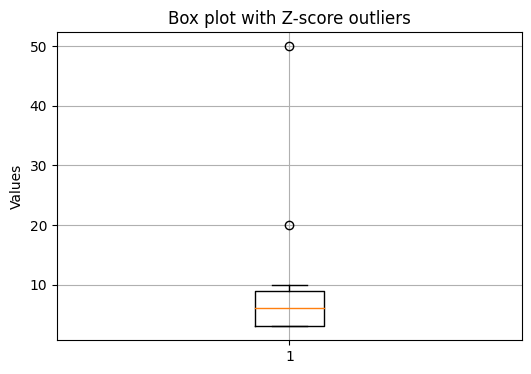

In [67]:
# Given data
data_points = [6, 3, 9, 6, 9, 20, 3, 10, 3, 50, 6, 5, 9, 9, 3, 6, 3]

# Calculating Z-scores
z_scores = np.abs((data_points - np.mean(data_points)) / np.std(data_points))
print(z_scores)

threshold = 3
outliers = np.where(z_scores > threshold)[0]
outlier_values = np.array(data_points)[outliers]

print(f"Identified outliers indices: {outliers}")
print(f"Outlier values: {outlier_values}")

plt.figure(figsize=(6, 4))
bp = plt.boxplot(data_points)
plt.grid(True)

plt.title('Box plot with Z-score outliers')
plt.ylabel('Values')
plt.show()

PART C

In [15]:
#import statements
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd

In [16]:
dataQ1 = pd.read_csv('/content/drive//MyDrive/Assignment4/Q1_dataset.csv')
print(dataQ1.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

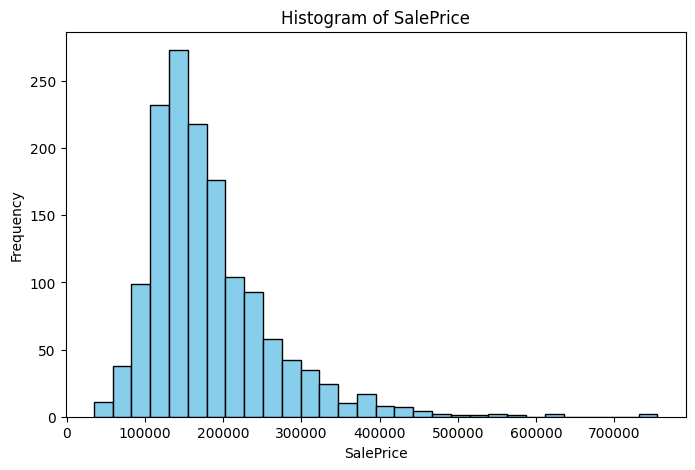

In [17]:
# Step 1
sale_price = dataQ1['SalePrice']
plt.figure(figsize=(8, 5))
plt.hist(sale_price, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

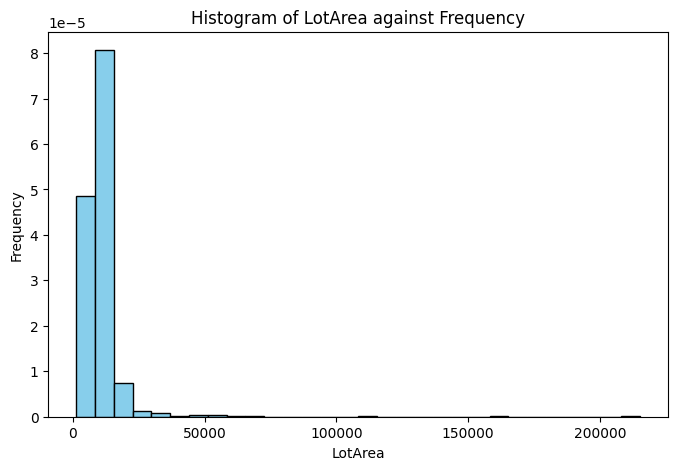

In [60]:
lot_area = dataQ1['LotArea']
plt.figure(figsize=(8, 5))
plt.hist(lot_area, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title('Histogram of LotArea against Frequency')
plt.xlabel('LotArea')
plt.ylabel('Frequency')
plt.show()

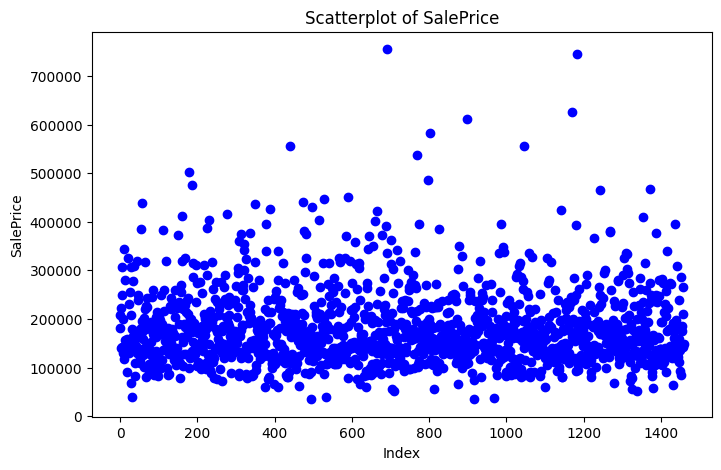

In [18]:
# Plot scatterplot for 'SalePrice' vs index
plt.figure(figsize=(8, 5))
plt.scatter(dataQ1.index, sale_price, color='blue')
plt.title('Scatterplot of SalePrice')
plt.xlabel('Index')
plt.ylabel('SalePrice')
plt.show()

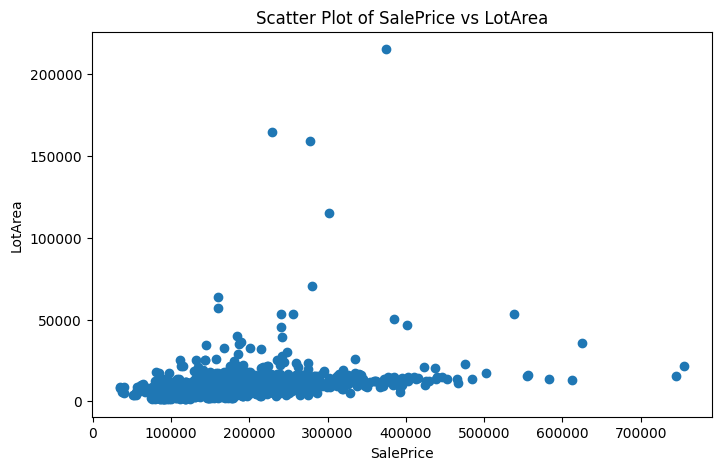

In [17]:
# plotting'SalePrice' vs 'LotArea'
plt.figure(figsize=(8, 5))
plt.scatter(dataQ1['SalePrice'],dataQ1['LotArea'])
plt.title('Scatter Plot of SalePrice vs LotArea')
plt.xlabel('SalePrice')
plt.ylabel('LotArea')
plt.show()

In [19]:
# Step 2
# Z-scores -'SalePrice' - multiple thresholds
thresholds = [2, 2.5, 3, 3.5]
for threshold in thresholds:
    z_scores = np.abs((sale_price - np.mean(sale_price)) / np.std(sale_price))
    outliers = sale_price[z_scores > threshold]
    print(f"Number of outliers for threshold {threshold}: {len(outliers)}")


Number of outliers for threshold 2: 63
Number of outliers for threshold 2.5: 40
Number of outliers for threshold 3: 22
Number of outliers for threshold 3.5: 13


In [68]:
#Step 3
threshold = 3

# Identify -> remove outliers (threshold = 3)
z_scores = np.abs((sale_price - np.mean(sale_price)) / np.std(sale_price))
outliers = sale_price[z_scores > threshold]
print(f"Outliers removed: {outliers}")

# Rest of the data after removing outliers
filtered_data = sale_price[z_scores <= threshold]
print(f"Filtered data: {filtered_data}")

print(f"Number of outliers removed for threshold {threshold}: {len(outliers)}")

Outliers removed: 58      438780
178     501837
185     475000
349     437154
389     426000
440     555000
473     440000
496     430000
527     446261
591     451950
664     423000
691     755000
769     538000
798     485000
803     582933
898     611657
1046    556581
1142    424870
1169    625000
1182    745000
1243    465000
1373    466500
Name: SalePrice, dtype: int64
Filtered data: 0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1438, dtype: int64
Number of outliers removed for threshold 3: 22


In [21]:
#Step 4

lot_area = dataQ1['LotArea']

lof_sale_price = LocalOutlierFactor(n_neighbors=20)
outliers_lof_sale_price = lof_sale_price.fit_predict(sale_price.values.reshape(-1, 1))

lof_lot_area = LocalOutlierFactor(n_neighbors=20)
outliers_lof_lot_area = lof_lot_area.fit_predict(lot_area.values.reshape(-1, 1))


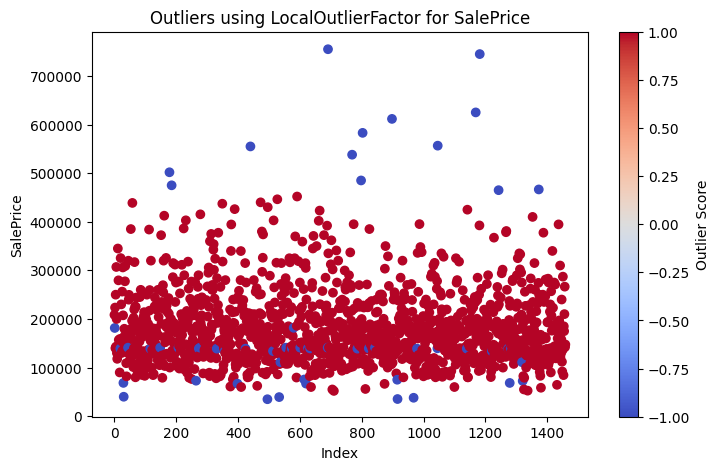

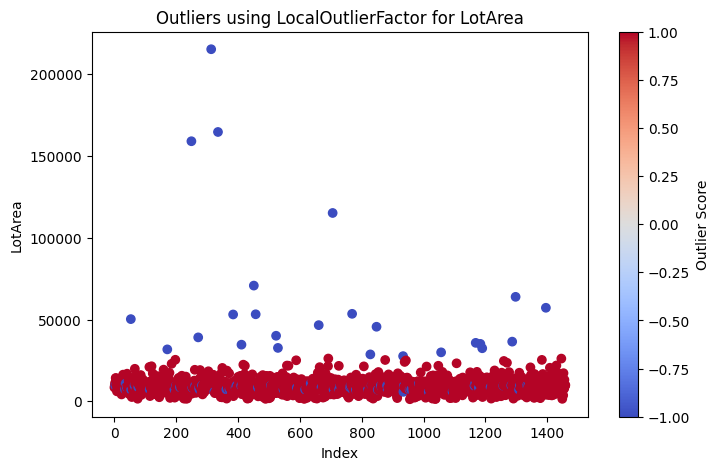

In [33]:
# Plot outliers using LocalOutlierFactor for 'SalePrice'
plt.figure(figsize=(8, 5))
plt.scatter(dataQ1.index, sale_price, c=outliers_lof_sale_price, cmap='coolwarm')
plt.title('Outliers using LocalOutlierFactor for SalePrice')
plt.xlabel('Index')
plt.ylabel('SalePrice')
plt.colorbar(label='Outlier Score')
plt.show()
print()

# Plot outliers using LocalOutlierFactor for 'LotArea'
plt.figure(figsize=(8, 5))
plt.scatter(dataQ1.index, lot_area, c=outliers_lof_lot_area, cmap='coolwarm')
plt.title('Outliers using LocalOutlierFactor for LotArea')
plt.xlabel('Index')
plt.ylabel('LotArea')
plt.colorbar(label='Outlier Score')
plt.show()


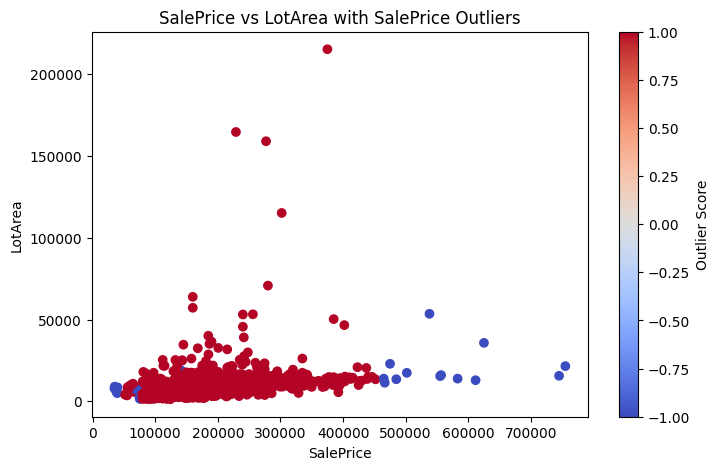

In [25]:
# Plotting SalePrice vs LotArea with outliers highlighted by LOF
plt.figure(figsize=(8, 5))
plt.scatter(sale_price, lot_area, c=outliers_lof_sale_price, cmap='coolwarm')
plt.title('SalePrice vs LotArea with SalePrice Outliers')
plt.xlabel('SalePrice')
plt.ylabel('LotArea')
plt.colorbar(label='Outlier Score')
plt.show()

## 2. PCA (35 points)

Accuracy Comparison for Logistic Regression model: before and after PCA.
Please follow the following steps:

  1. Seperate and standardize the disease classification dataset. (5 points)
  2. Do Eigen decomposition using any LA library of your choice. Display scree plot. (10 points)
  3. Primary Component Selection. (Select the first 6 components) (5 points)
  4. Projection in a New Feature Space. (5 points)
  5. Principal Component Analysis. (5 points)
  6. Compare the presision and recall for the data using logistic regression before and after PCA. (10 points)

In [35]:
#imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
import pandas as pd

In [37]:
dataQ2 = pd.read_csv('/content/drive//MyDrive/Assignment4/Q2_dataset.csv')
print(dataQ2.head())

   id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0   0       1  0.85247  0.71826  0.57227        240               239   
1   0       1  0.76686  0.69481  0.53966        234               233   
2   0       1  0.85083  0.67604  0.58982        232               231   
3   1       0  0.41121  0.79672  0.59257        178               177   
4   1       0  0.32790  0.79782  0.53028        236               235   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0          0.008064            0.000087       0.00218  ...   
1          0.008258            0.000073       0.00195  ...   
2          0.008340            0.000060       0.00176  ...   
3          0.010858            0.000183       0.00419  ...   
4          0.008162            0.002669       0.00535  ...   

   tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
0                     1.5620                     2.6445   
1                     1.5589                     3.6107   
2          

In [70]:
# Separate and standardize the dataset
features = dataQ2.drop('class', axis=1)
target = dataQ2['class']
X_train_custom, X_test_custom, y_train_custom, y_test_custom = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler_custom = StandardScaler()
X_train_scaled_custom = scaler_custom.fit_transform(X_train_custom)
X_test_scaled_custom = scaler_custom.transform(X_test_custom)


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


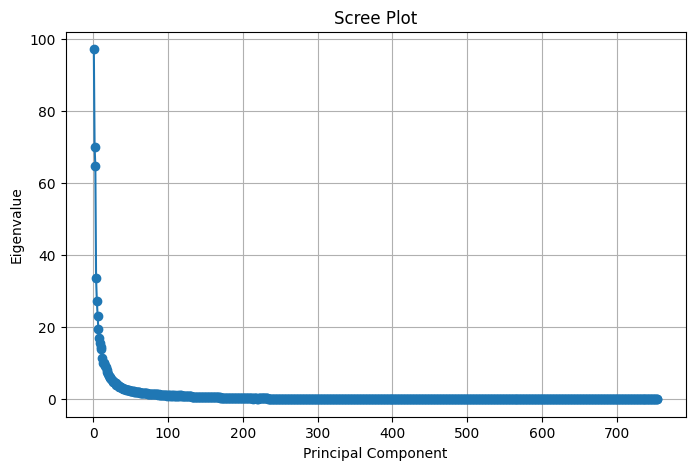

In [71]:
# Calculate the covariance matrix
cov_matrix_custom = np.cov(X_train_scaled_custom.T)

# Perform Eigen decomposition
eigenvalues_custom, eigenvectors_custom = np.linalg.eig(cov_matrix_custom)

# Display scree plot using the calculated eigenvalues
plt.figure(figsize=(8, 5))
plt.grid(True)
plt.plot(np.arange(1, len(eigenvalues_custom) + 1), eigenvalues_custom, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

In [73]:
# Primary Component Selection
selected_components = eigenvectors_custom[:, :6]

In [74]:
# Project data into new feature space
X_train_projected = X_train_scaled_custom.dot(selected_components)
X_test_projected = X_test_scaled_custom.dot(selected_components)

In [75]:
# Principal Component Analysis - select the first 6 components
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled_custom)
X_test_pca = pca.transform(X_test_scaled_custom)

In [76]:
# logistic regression model
logreg_original = LogisticRegression(max_iter=1000)
logreg_original.fit(X_train_scaled_custom, y_train_custom)

logreg_pca = LogisticRegression(max_iter=1000)
logreg_pca.fit(X_train_pca, y_train_custom)

# Evaluate models - precision and recall
y_pred_original = logreg_original.predict(X_test_scaled_custom)
precision_original = precision_score(y_test_custom, y_pred_original)
recall_original = recall_score(y_test_custom, y_pred_original)

y_pred_pca = logreg_pca.predict(X_test_pca)
precision_pca = precision_score(y_test_custom, y_pred_pca)
recall_pca = recall_score(y_test_custom, y_pred_pca)


In [77]:
# Create a DataFrame for precision and recall scores
results = {
    'Metric': ['Precision', 'Recall'],
    'Original Data': [precision_original, recall_original],
    'PCA-transformed Data': [precision_pca, recall_pca]
}

results_df = pd.DataFrame(results)
print(results_df)

      Metric  Original Data  PCA-transformed Data
0  Precision       0.891667              0.866142
1     Recall       0.938596              0.964912


## 3. EM Algorithm (35 points)

Etimate the probability distribution in a 1-dimensional dataset
There are two Normal distributions  𝑁(𝜇1,𝜎1^2) and 𝑁(𝜇2,𝜎2^2).
There are 5 paramaters to estimate: 𝜃=(𝑤,𝜇1,𝜎1^2,𝜇2,𝜎2^2) where 𝑤 is the probability that the data comes from the first normal probability distribution and (1-𝑤) comes from the second normal probability distribution.
The probability density function (PDF) of the mixture model is: 𝑓(𝑥|𝜃)=𝑤 𝑓1(𝑥 | 𝜇1,𝜎1^2)+(1−𝑤) 𝑓2(𝑥 | 𝜇2,𝜎2^2)
Your goal is to best fit a given probability density by finding 𝜃=(𝑤,𝜇1,𝜎1^2,𝜇2,𝜎2^2) through EM iterations.

Using the following way to produce data:
```python
import numpy as np
random_seed=36784765
np.random.seed(random_seed)

Mean1 = 9.0  # Input parameter, mean of first normal probability distribution
Standard_dev1 = 5.0 #@param {type:"number"}
Mean2 = 2.0 # Input parameter, mean of second normal  probability distribution
Standard_dev2 = 2.0 #@param {type:"number"}

# generate data
y1 = np.random.normal(Mean1, Standard_dev1, 500)
y2 = np.random.normal(Mean2, Standard_dev2, 2000)
data=np.append(y1,y2)

```

(1) Using a single Gaussion to estimate and draw a picure to see the result: (5 points)
```python
class Gaussian:
"Model univariate Gaussian"
def __init__(self, mu, sigma):
    #mean and standard deviation


#probability density function
def pdf(self, datum):
    "Probability of a data point given the current parameters"
```

(2) Using a 2 Gaussian mixture model to estimate and draw a picture to see the result(Do not use sklearn GaussianMixture): (30 points)
```python
class GaussianMixture_self:
"Model mixture of two univariate Gaussians and their EM estimation"

def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=1, sigma_max=1, mix=.5):


def Estep(self):
    "Perform an E(stimation)-step, assign each point to gaussian 1 or 2 with a percentage"

def Mstep(self, weights):
    "Perform an M(aximization)-step"

def iterate(self, N=1, verbose=False):
    "Perform N iterations, then compute log-likelihood"

def pdf(self, x):
        
```

In [52]:
#imports
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# Given data
random_seed = 36784765
np.random.seed(random_seed)
Mean1 = 9.0
Standard_dev1 = 5.0
Mean2 = 2.0
Standard_dev2 = 2.0

# Generate data
y1 = np.random.normal(Mean1, Standard_dev1, 500)
y2 = np.random.normal(Mean2, Standard_dev2, 2000)
data = np.append(y1, y2)

In [54]:
class Gaussian:
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma

    def pdf(self, datum):
        return np.exp(-((datum - self.mu) ** 2) / (2 * self.sigma ** 2)) / (np.sqrt(2 * np.pi) * self.sigma)


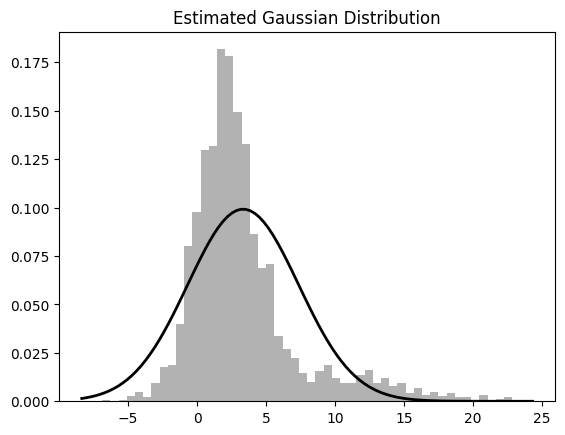

In [55]:
# Create and fit Gaussian model to the data
estimated_mean = np.mean(data)
estimated_std = np.std(data)
model = Gaussian(estimated_mean, estimated_std)

# Plotting
plt.hist(data, bins=50, density=True, alpha=0.6, color='grey')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
plt.plot(x, model.pdf(x), 'k', linewidth=2)
plt.title('Estimated Gaussian Distribution')
plt.show()


In [56]:
class GaussianMixture_self:
    def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=1, sigma_max=1, mix=.5):
        self.data = data
        self.mu1 = np.random.uniform(mu_min, mu_max)
        self.mu2 = np.random.uniform(mu_min, mu_max)
        self.sigma1 = np.random.uniform(sigma_min, sigma_max)
        self.sigma2 = np.random.uniform(sigma_min, sigma_max)
        self.mix = mix

    def pdf(self, x):
        "Probability density function"
        return self.mix * self.calculate_normal_pdf(x, self.mu1, self.sigma1) + \
               (1 - self.mix) * self.calculate_normal_pdf(x, self.mu2, self.sigma2)

    @staticmethod
    def calculate_normal_pdf(x, mu, sigma):
        return np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) / (np.sqrt(2 * np.pi) * sigma)

    def Estep(self):
        "Perform an E(stimation)-step, assign each point to Gaussian 1 or 2 with a percentage"
        likelihood1 = self.calculate_normal_pdf(self.data, self.mu1, self.sigma1)
        likelihood2 = self.calculate_normal_pdf(self.data, self.mu2, self.sigma2)

        weight1 = (self.mix * likelihood1) / (self.mix * likelihood1 + (1 - self.mix) * likelihood2)
        weight2 = 1 - weight1

        return weight1, weight2

    def Mstep(self, weights):
        "Perform an M(aximization)-step"
        self.mu1 = np.sum(weights[0] * self.data) / np.sum(weights[0])
        self.mu2 = np.sum(weights[1] * self.data) / np.sum(weights[1])

        self.sigma1 = np.sqrt(np.sum(weights[0] * (self.data - self.mu1) ** 2) / np.sum(weights[0]))
        self.sigma2 = np.sqrt(np.sum(weights[1] * (self.data - self.mu2) ** 2) / np.sum(weights[1]))

        self.mix = np.mean(weights[0])

    def iterate(self, N=1, verbose=False):

      for i in range(N):
        weights = self.Estep()
        self.Mstep(weights)

        if verbose and (i + 1) % 10 == 0:
            log_likelihood = np.sum(np.log(self.pdf(self.data)))
            print(f"Iteration {i + 1}, Log-Likelihood: {log_likelihood:.4f}")

      log_likelihood = np.sum(np.log(self.pdf(self.data)))
      return log_likelihood

Iteration 10, Log-Likelihood: -6425.7725
Iteration 20, Log-Likelihood: -6421.2707
Iteration 30, Log-Likelihood: -6419.3085
Iteration 40, Log-Likelihood: -6417.7991
Iteration 50, Log-Likelihood: -6417.1783
Iteration 60, Log-Likelihood: -6417.0415
Iteration 70, Log-Likelihood: -6417.0198
Iteration 80, Log-Likelihood: -6417.0168
Iteration 90, Log-Likelihood: -6417.0164
Iteration 100, Log-Likelihood: -6417.0163


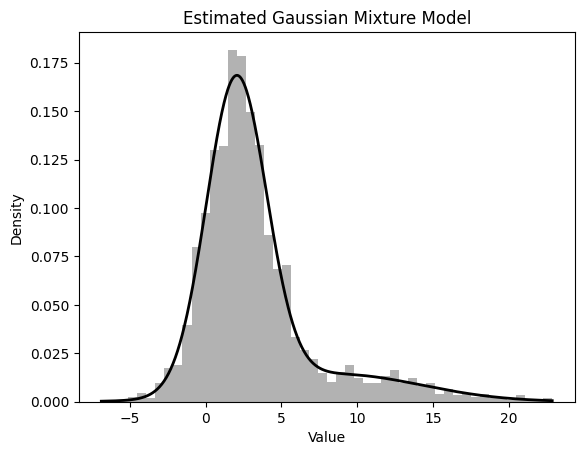

In [58]:
# Create and fit Gaussian Mixture model to the data
model = GaussianMixture_self(data)
log_likelihood = model.iterate(N=100, verbose=True)

# Plotting
plt.hist(data, bins=50, density=True, alpha=0.6, color='grey')  # Histogram of data

x = np.linspace(min(data), max(data), 1000)
plt.plot(x, model.pdf(x), 'k', linewidth=2)  # Plot the estimated Gaussian Mixture PDF

plt.title('Estimated Gaussian Mixture Model')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

In [78]:
!jupyter nbconvert --to html /content/drive/MyDrive/Assignment4_ML.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Assignment4_ML.ipynb to html
[NbConvertApp] Writing 1212933 bytes to /content/drive/MyDrive/Assignment4_ML.html
